# Model Training by keras

In [1]:
import data_importer
import model as md
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.keras.backend.set_floatx('float32')
inputs = tf.keras.Input(shape=(480,640,3))
model = md.deep_lab_v3(inputs=inputs)
# model.summary()

In [3]:
# model = tf.keras.utils.multi_gpu_model(model, gpus=2)
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Imporing Dataset

E:\Programs\Anaconda3\envs\tf\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


float32 uint8 (2, 480, 640, 3) (2, 480, 640, 1)


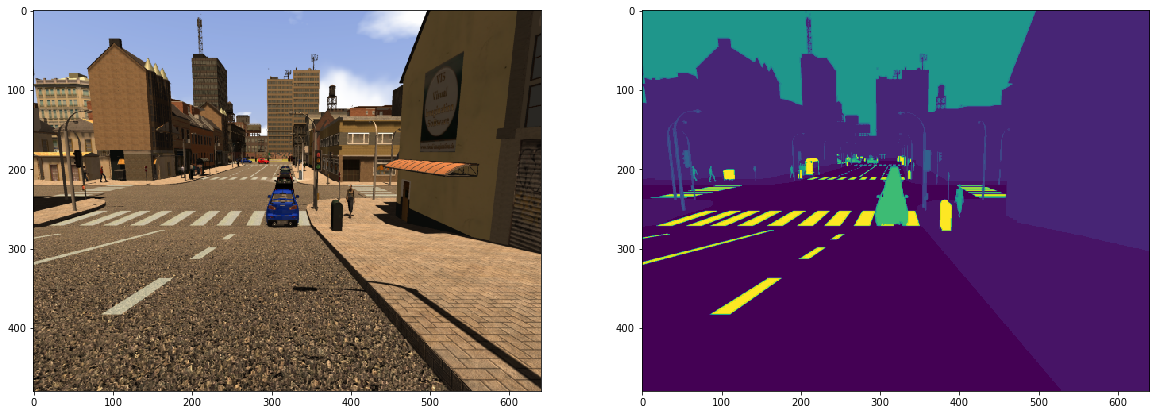

In [4]:
import data_importer
address = 'D:/Library/Datasets/SYNTHIA-SF/'
batch_size = 2
SYNTHIA_train = data_importer.NewSynthiaSf(address,label_type='sparse_segmentation', usage='train',
                                    batch_size=batch_size, repeater=True, shuffle=True, output_shape=(480, 640), data_type=0, ratio=(0.7, 0.1))
SYNTHIA_validation = data_importer.NewSynthiaSf(address,label_type='sparse_segmentation', usage='validation',
                                    batch_size=batch_size, repeater=True, shuffle=True, output_shape=(480, 640), data_type=0, ratio=(0.7, 0.1))
SYNTHIA_test = data_importer.NewSynthiaSf(address,label_type='sparse_segmentation', usage='test',
                                    batch_size=batch_size, repeater=True, shuffle=True, output_shape=(480, 640), data_type=0, ratio=(0.7, 0.1))
preview = iter(SYNTHIA_train)
a,b=next(preview)
plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
plt.imshow(np.float32(a[0]))
plt.subplot(1,2,2)
plt.imshow(b[0,:,:,0])
plt.viridis()

print(a.dtype, b.dtype, a.shape, b.shape)

In [5]:
address = './log/2gpu_2PerBatch/'
train_step = np.int((SYNTHIA_train.end_index - SYNTHIA_train.start_index)/batch_size)
validation_steps = np.int(SYNTHIA_validation.end_index - SYNTHIA_validation.start_index/batch_size)
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(address + "my_keras_model.h5"),
    tf.keras.callbacks.EarlyStopping(patience=4, monitor='loss'),
    # Write TensorBoard logs to `./logs` directory
    tf.keras.callbacks.TensorBoard(log_dir=address)
]
model.fit_generator(SYNTHIA_train, steps_per_epoch=train_step, epochs=30, callbacks=callbacks, 
                    validation_data=SYNTHIA_validation, validation_steps=validation_steps)

Epoch 1/30
1556/1556 [==============================] - 4564s 3s/step - loss: 10.4198 - acc: 0.8570 - val_loss: 2.9034 - val_acc: 0.7970
Epoch 2/30
1556/1556 [==============================] - 4476s 3s/step - loss: 1.7078 - acc: 0.8962 - val_loss: 1.4353 - val_acc: 0.9020
Epoch 3/30
1556/1556 [==============================] - 4466s 3s/step - loss: 1.2093 - acc: 0.9081 - val_loss: 1.2468 - val_acc: 0.8895
Epoch 4/30
1556/1556 [==============================] - 4479s 3s/step - loss: 1.0531 - acc: 0.9132 - val_loss: 1.3800 - val_acc: 0.8681
Epoch 5/30
1556/1556 [==============================] - 4475s 3s/step - loss: 0.9359 - acc: 0.9185 - val_loss: 2.3881 - val_acc: 0.6863
Epoch 6/30
1556/1556 [==============================] - 4440s 3s/step - loss: 0.8794 - acc: 0.9211 - val_loss: 1.0320 - val_acc: 0.8943
Epoch 7/30
1556/1556 [==============================] - 4437s 3s/step - loss: 0.8091 - acc: 0.9249 - val_loss: 0.7974 - val_acc: 0.9177
Epoch 8/30
1556/1556 [=========================

# Evaluatation and Prediction

In [7]:
steps = SYNTHIA_test.end_index - SYNTHIA_test.start_index
model.evaluate_generator(SYNTHIA_test, steps=steps)

E:\Programs\Anaconda3\envs\tf\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


[0.506800078542045, 0.9355068504140618]

In [28]:
preview = iter(SYNTHIA_test)
a,b=next(preview)
model.evaluate(a,b)

2/2 [==============================] - 0s 52ms/step


[0.42902231216430664, 0.94515460729599]

In [29]:
c=model.predict(a,steps=1)

In [30]:
d = np.ndarray(shape=c.shape[1:3])
for i in range(c.shape[1]):
    for j in range(c.shape[2]):
        d[i, j] = c[0, i, j].argmax()

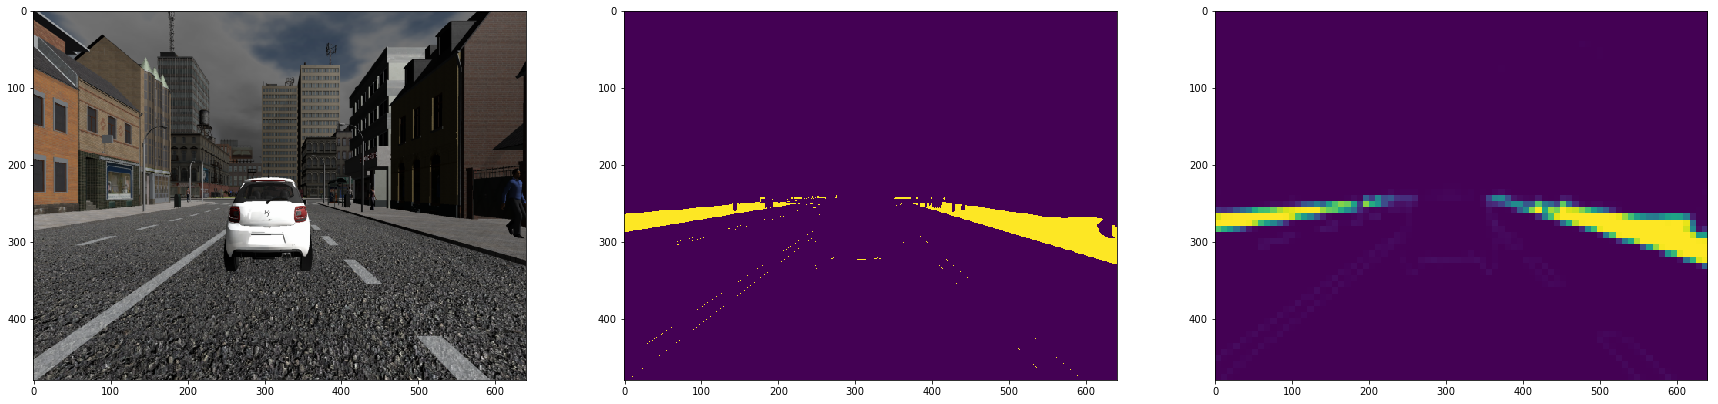

In [31]:
i=2
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(a[0,:,:])
plt.subplot(1,3,2)
plt.imshow(b[0,:,:,0]==i)
plt.subplot(1,3,3)
plt.imshow(c[0,:,:,i])

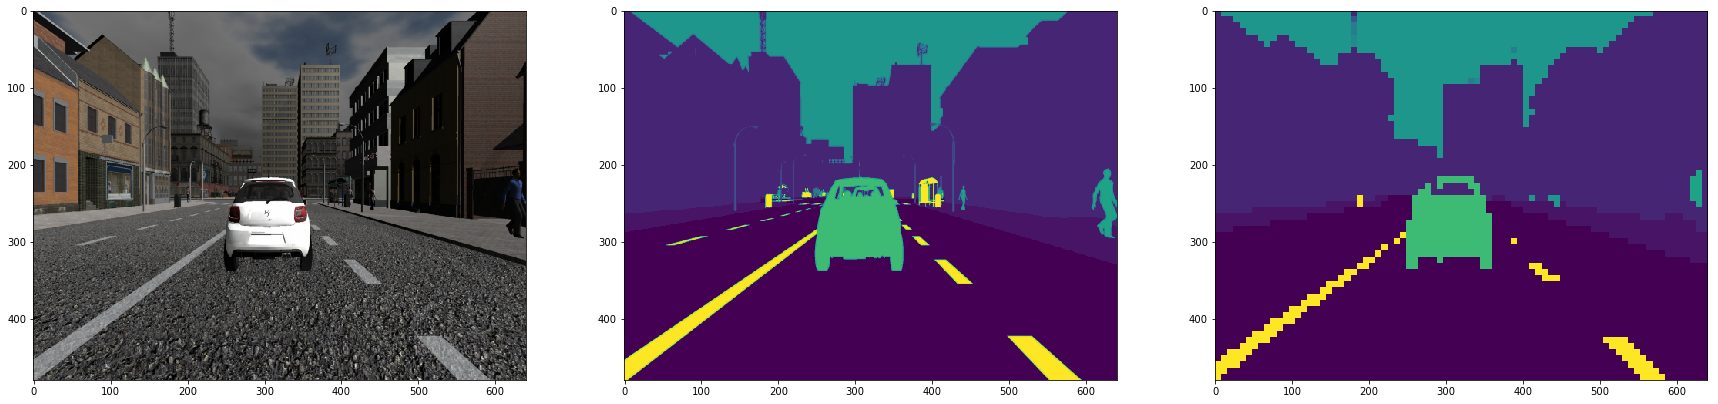

In [32]:
i=3
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(a[0,:,:])
plt.subplot(1,3,2)
plt.imshow(b[0,:,:,0])
plt.subplot(1,3,3)
plt.imshow(d)